# Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_data_source (text): attribution for the reported generation information

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the above dataset we have to make two predictions in Fuel Type and capacity_mw which is our target variable

Whereas, in capacity_mw has continous data so we will perform regression and in Fuel Type has classiffication data, so we will perform classification problem

In [3]:
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


This method describe the first 5 columns of the dataset

In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This method describe the last 5 columns of the dataset

In [6]:
df.shape

(907, 27)

The above dataset consist of 907 rows and 27 columns which include our target variables 

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'Fuel_Type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

It provides the list of all the  columns of the dataset 

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In the above method it describe the different datatypes of different columns.

Mainly in the above dataset we have 2 datatype columns float64 and object datatype.

Further the dtype of the dataset is object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

This method describ the good overview of the dataset.

In the dataset there is float and object datatype is  present

There is no null values present in the dataset.

The dtypes of the dataset is float64 and object.

The memory usage of the dataset is 191.4+ KB



In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

This method describe the number of unique values presnet in each columns

In columns country,country_long,other_fuel2,year_of_capacity_data and generation_data_source has only one unique value.

In columns other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh didnot have null values.

In [11]:
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In the above dataset there is only one country india which is  present in all the columns of the dataset, so we will remove the country column as it is no required anymore 

In [12]:
df.drop(columns=["country"],axis=1,inplace=True)

In [13]:
df.drop(columns=["country_long"],axis=1, inplace=True)

In [14]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In the above dataset after removing the country column and country_long column, now  we have 907 rows and 25 columns.

In [15]:
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2019","generation_gwh_2013","estimated_generation_gwh"], axis=1, inplace=True)


In the above dataset removing the irrelevant columns which is having 1 null values and nan values columns 

In [16]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


After removing the nan values and 1 null values we have new dataset with 907 rows and 17 columns

In [17]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [18]:
df.drop("name",axis=1,inplace=True)

In [19]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [20]:
df.drop("gppd_idnr",axis=1,inplace=True)

In [21]:
df.drop(columns=["owner", "url"], axis=1, inplace=True)


In [22]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In the above dataset after removing the irrelevant data again,now we have 907 rows and 13 columns 

In [23]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In the above dataset,after removing the irrelevant columns, again checking the null values in the columns

In [24]:
df.nunique()

capacity_mw            361
latitude               836
longitude              827
Fuel_Type                8
other_fuel1              3
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

<AxesSubplot:>

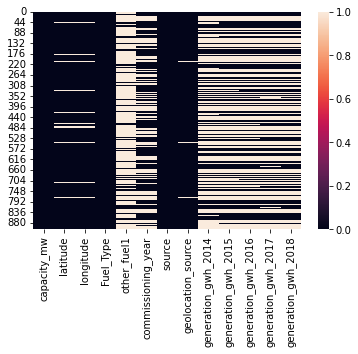

In [25]:
sns.heatmap(df.isnull())

In the above dataset, it shows the dataset contains the missing values 

In [26]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In the above dataset some columns are having missing values and further there is skewness present in the data as the acceptable range for skewness is between +/-0.5. 

In [27]:
df['latitude'].mean() 

21.19791811846691

In [28]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())

In [29]:
df["other_fuel1"].mode()

0    Oil
Name: other_fuel1, dtype: object

In [30]:
df["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

In [31]:
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [32]:
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [33]:
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [34]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In the above dataset there is no null value

<AxesSubplot:>

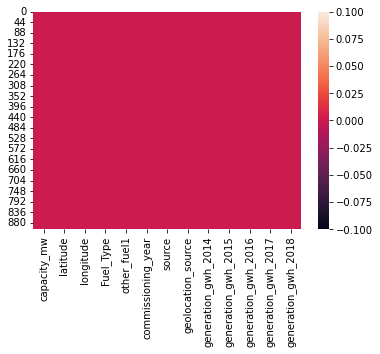

In [35]:

sns.heatmap(df.isnull())

From the above method we have clearly visualize that there are no missing values.

In [36]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

After removing the irrelevant column and removing the null values wee have check the columns 

In [37]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In column capacity_mw there is number of unique count present 

In [38]:
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In column primary_fuel number of value count is present 

In [39]:
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [40]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In  the above column commissioning_year number of value counts present

In [41]:
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

In [42]:
df.head(5)

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [43]:
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


In the above dataset there is no space in dataset 

In [44]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000



From the above description we can observe the following.

The above method gives the statistical information of the dataset. 

The dataset looks perfect as there is no negative/ invalid values present.

The counts of different columns are same and there are no missing values present in the dataset.

The mean is more than the median in all the columns except latitude which means they are skewed to right.

The median is bit greater than the mean in the column latitude which means it is skewed to left.

From the difference between maximum and 75% percentile we can find that there are huge outliers present in most of the columns.

The minimum capacity of the power plant is zero and maximum in 4760.



In [45]:
category_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_column.append(i)
print(category_column)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In the above dataset we catorized the category column of the dataset 

In [46]:
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_column.append(i)
print(numerical_column)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


In the above dataset we find the number columns of the dataset which is categorized in the numerical cloumns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


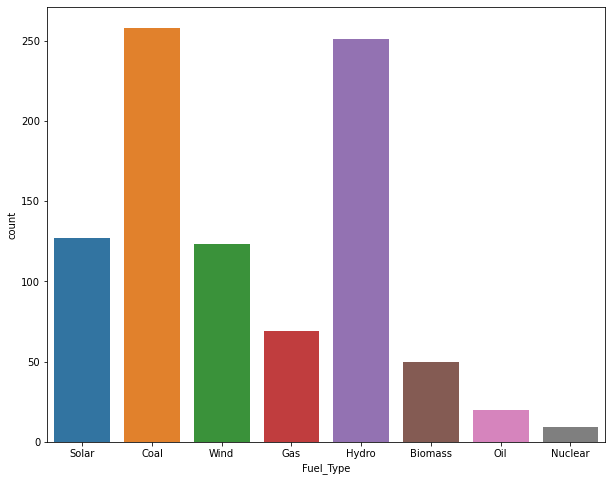

In [47]:
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df["Fuel_Type"])
plt.show()

In the above countplot of primary_fuel we find highest number of values have been covered by coal and hydro fuel types.

After the solar and hydro fuel type we find solar and wind with little less data and gas, biomass, oil and nuclear also have very low data values.


Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


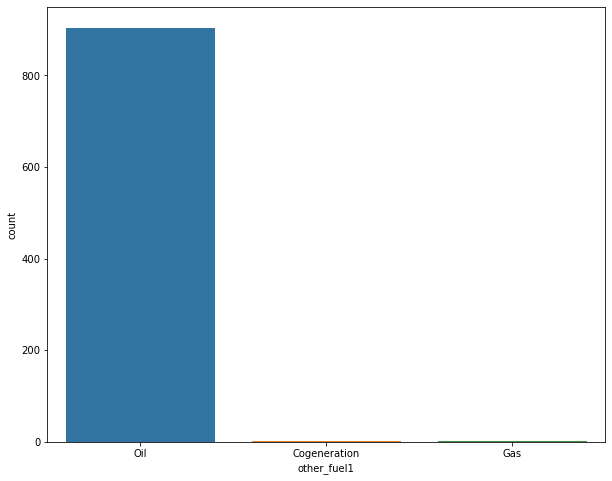

In [48]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df["other_fuel1"])
plt.show()


In the above plot we find the highest value count of oil as compared to gas and Cogeneration.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


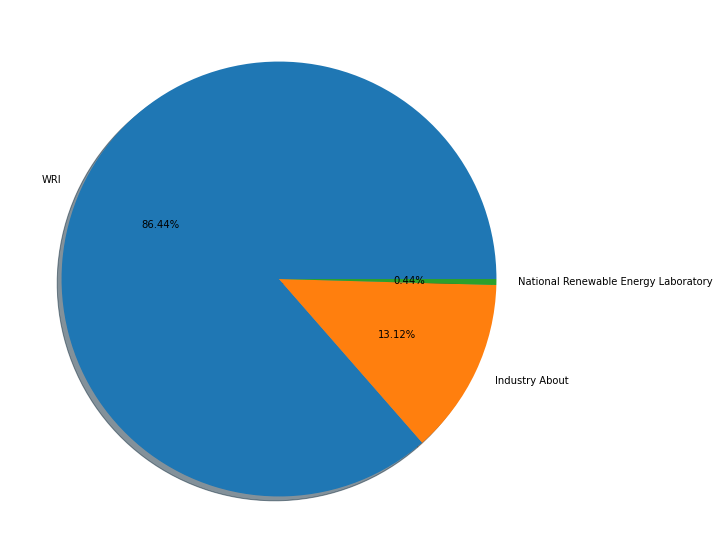

In [49]:
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(12,10))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The above plot shows the WRI has highest counts in the dataset.

Further it means WRI gives the more geolocation information compare to industry About and National Renewable Energy Laboratory.

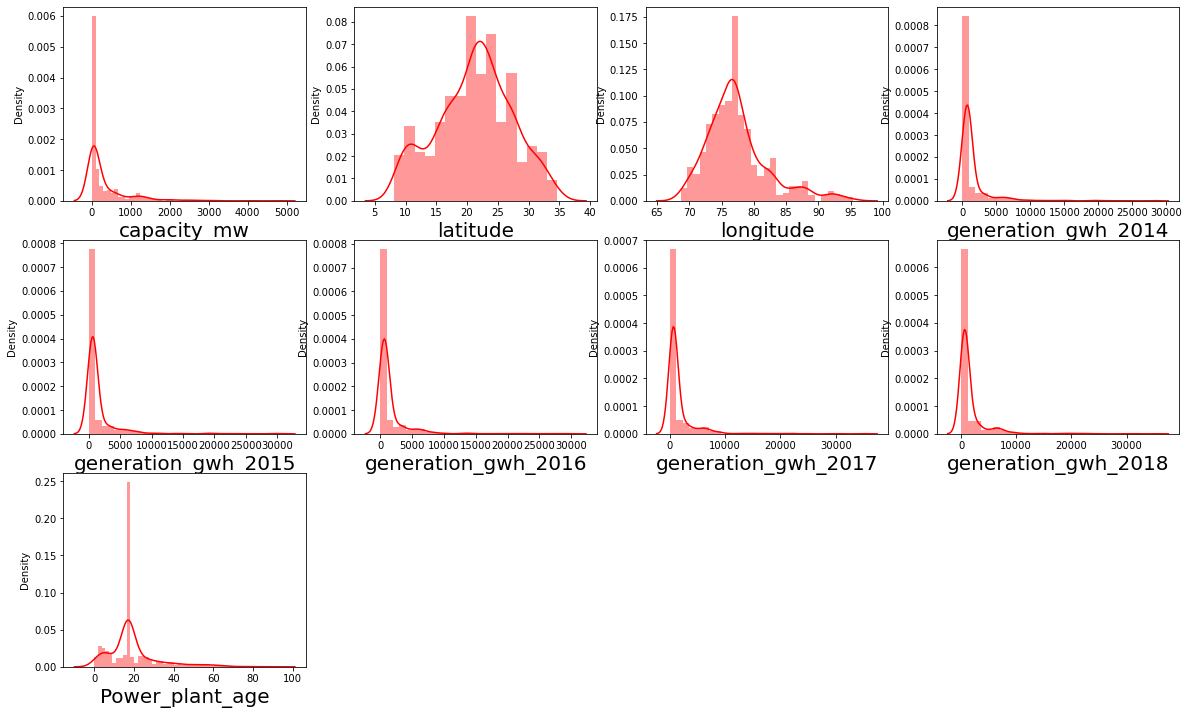

In [50]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_column:
    if plotnumber<=12:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


From the above plots we see that the data is not normally distributed in all the columns except latitude and longitude.

In most of the columns the mean is greater than the median which means they are skewed to right.

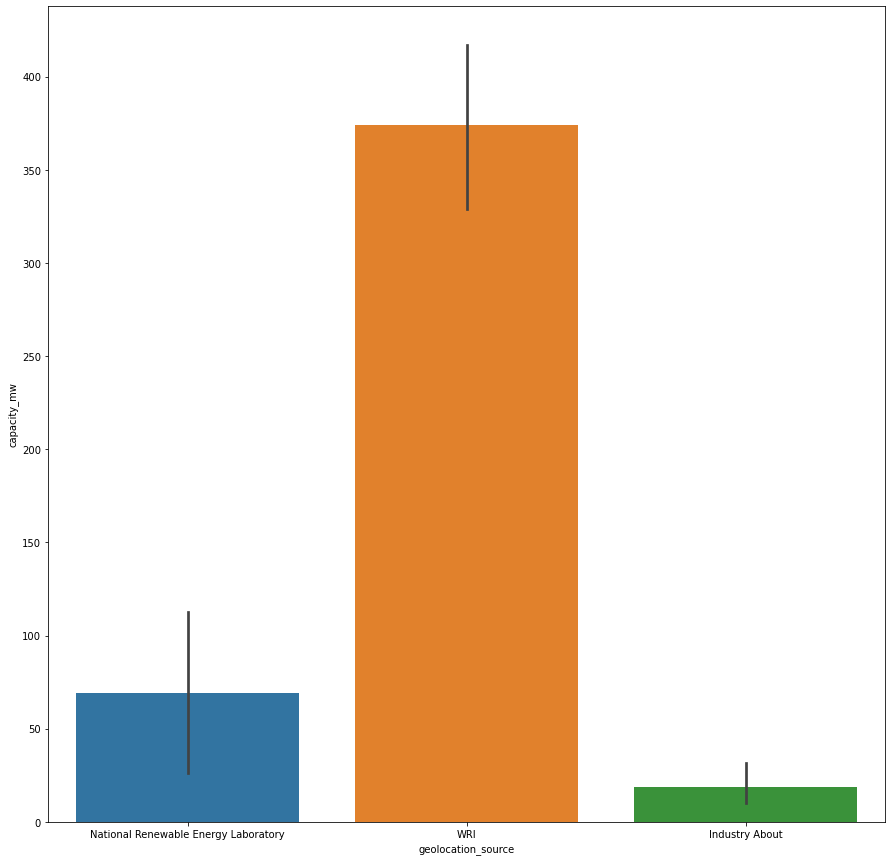

In [51]:
plt.figure(figsize=(15,15))
sns.barplot(x ="geolocation_source", y="capacity_mw", data = df)
plt.show()


In the above plot capacity of geolocation source WRI is maximum which has capacity more than industry About and National Renewable Energy Laboratory.

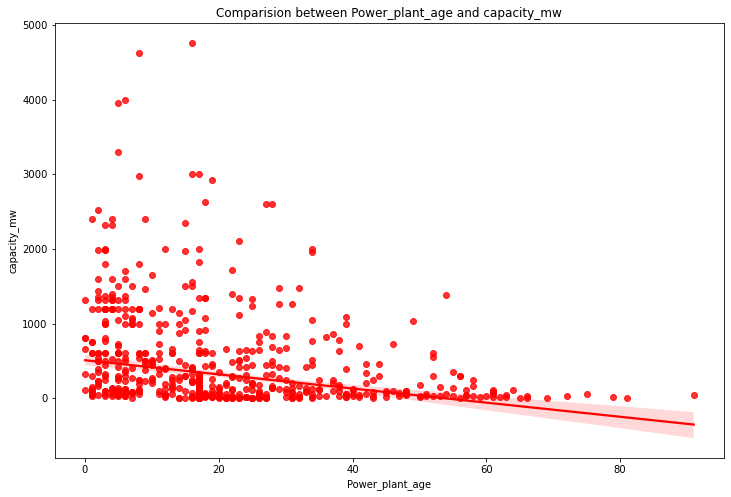

In [52]:
plt.figure(figsize=[12,8])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "r");

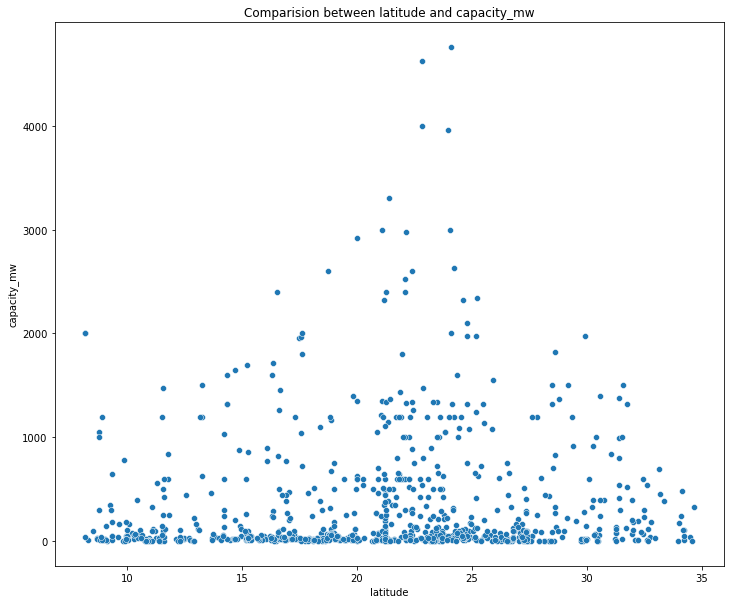

In [53]:
plt.figure(figsize=[12,10])
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"]);

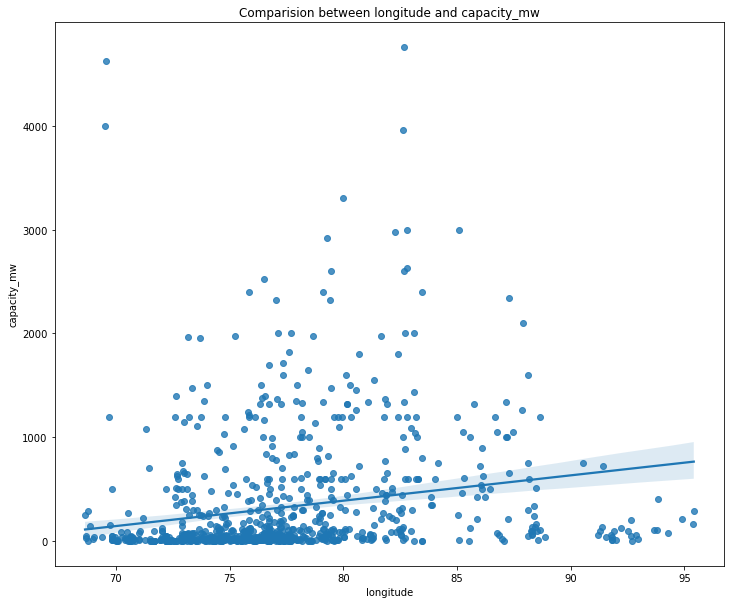

In [54]:
plt.figure(figsize=[12,10])
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

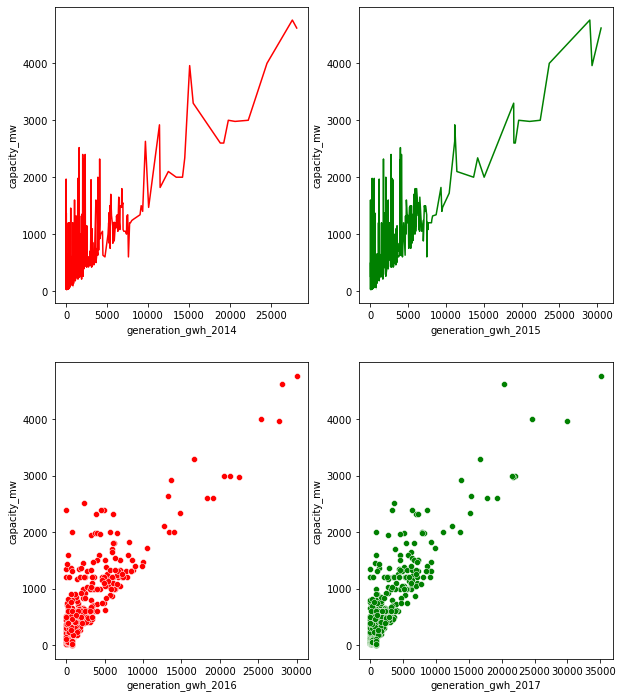

In [55]:
fig,axes=plt.subplots(2,2,figsize=(10,12))

sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="r")

sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="g")

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="r")

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="g")

plt.show()


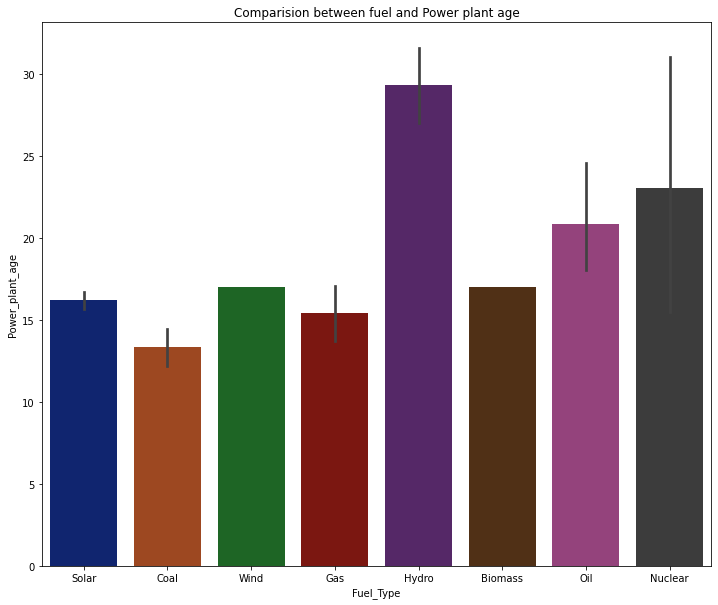

In [56]:
plt.figure(figsize = (12,10))
plt.title("Comparision between fuel and Power plant age")
sns.barplot(x = "Fuel_Type", y = "Power_plant_age", data = df,palette="dark")
plt.show()

From the above plot we observe that the old power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.


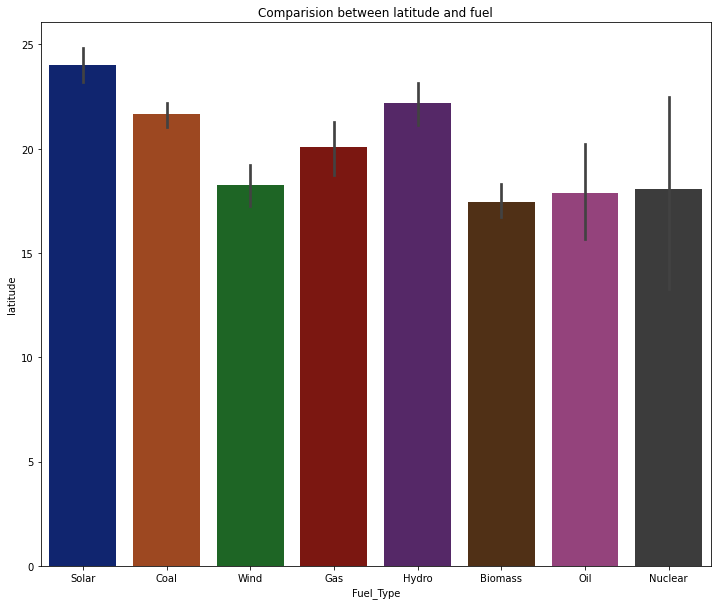

In [57]:
plt.figure(figsize=[12,10])
plt.title('Comparision between latitude and fuel')
sns.barplot(df["Fuel_Type"],df["latitude"],palette="dark");

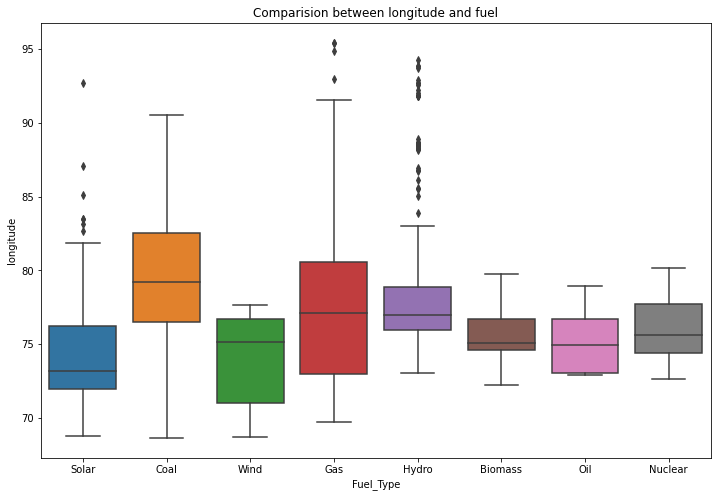

In [58]:
plt.figure(figsize=[12,8])
plt.title('Comparision between longitude and fuel')
sns.boxplot(df['Fuel_Type'],df["longitude"]);
plt.show()

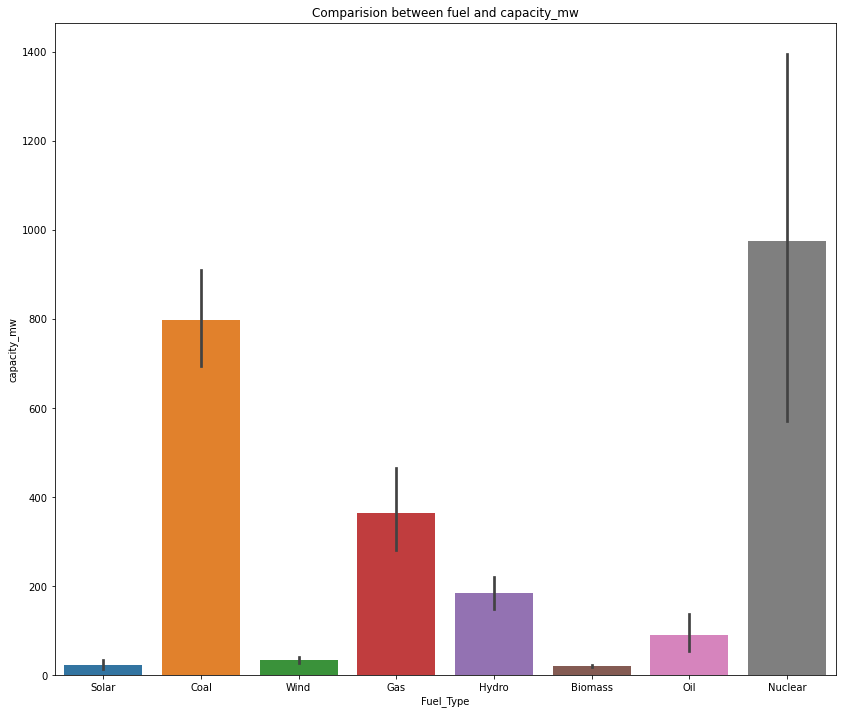

In [59]:
plt.figure(figsize = (14,12))
plt.title("Comparision between fuel and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

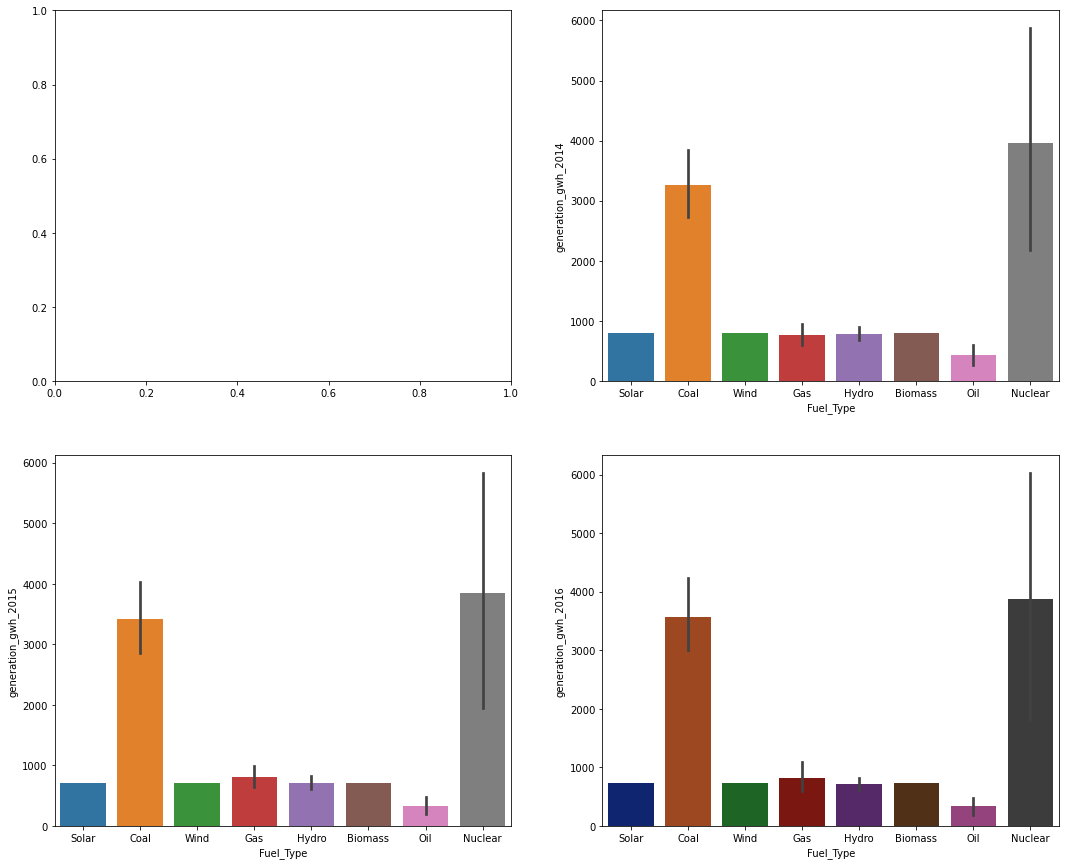

In [60]:
fig,axes=plt.subplots(2,2,figsize=(18,15))

sns.barplot(x='Fuel_Type',y='generation_gwh_2014',ax=axes[0,1],data=df)

sns.barplot(x='Fuel_Type',y='generation_gwh_2015',ax=axes[1,0],data=df)

sns.barplot(x='Fuel_Type',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="dark")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

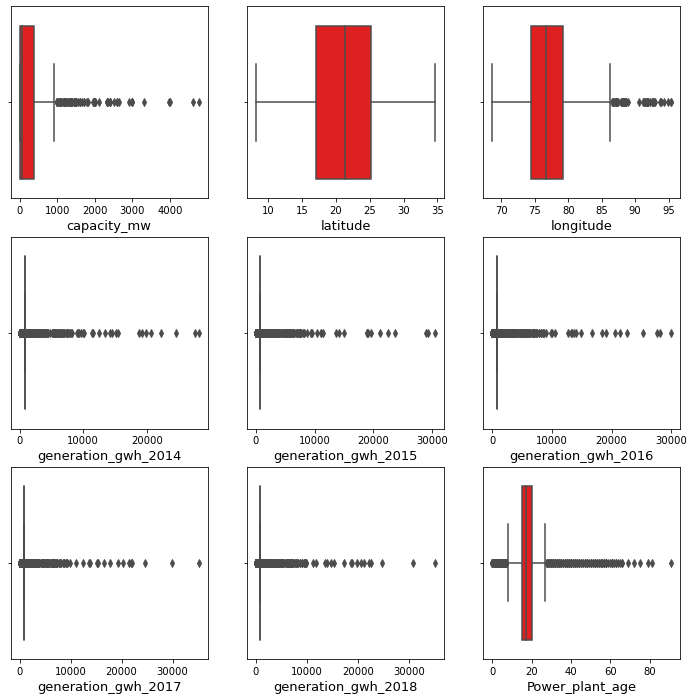

In [61]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_column:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show

In the above dataset we find there is outliers present in the data except latitude column.

In [62]:
features= df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']]

In the above dataset name of the input columns in which outliers is present 

In [63]:
from scipy.stats import zscore

z=np.abs(zscore(features))

z 

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [64]:
new_dataframe = df[(z<3).all(axis=1)] 
new_dataframe

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


The new dataframe after removing the outliers

In [65]:
df.shape

(907, 13)

It shows the shape of original dataset before removing the outliers

In [66]:
new_dataframe.shape

(851, 13)

It shows the number of rows and columns after removing the outliers

In [67]:
loss_data= (907-851)/907*100
loss_data

6.174200661521499

In the above step we are losing 6% of data by removing outliers.

In [68]:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [69]:
df1.shape

(420, 13)

In [70]:
loss_data =(907-420)/907*100
loss_data

53.69349503858876

In [71]:
category_column = ["Fuel_Type", 'other_fuel1', 'source', 'geolocation_source']

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_dataframe[category_column]= new_dataframe[category_column].apply(LE.fit_transform)

In [73]:
new_dataframe[category_column]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


convert the category column through encoded technique

In [74]:
corr = new_dataframe.corr()
corr

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


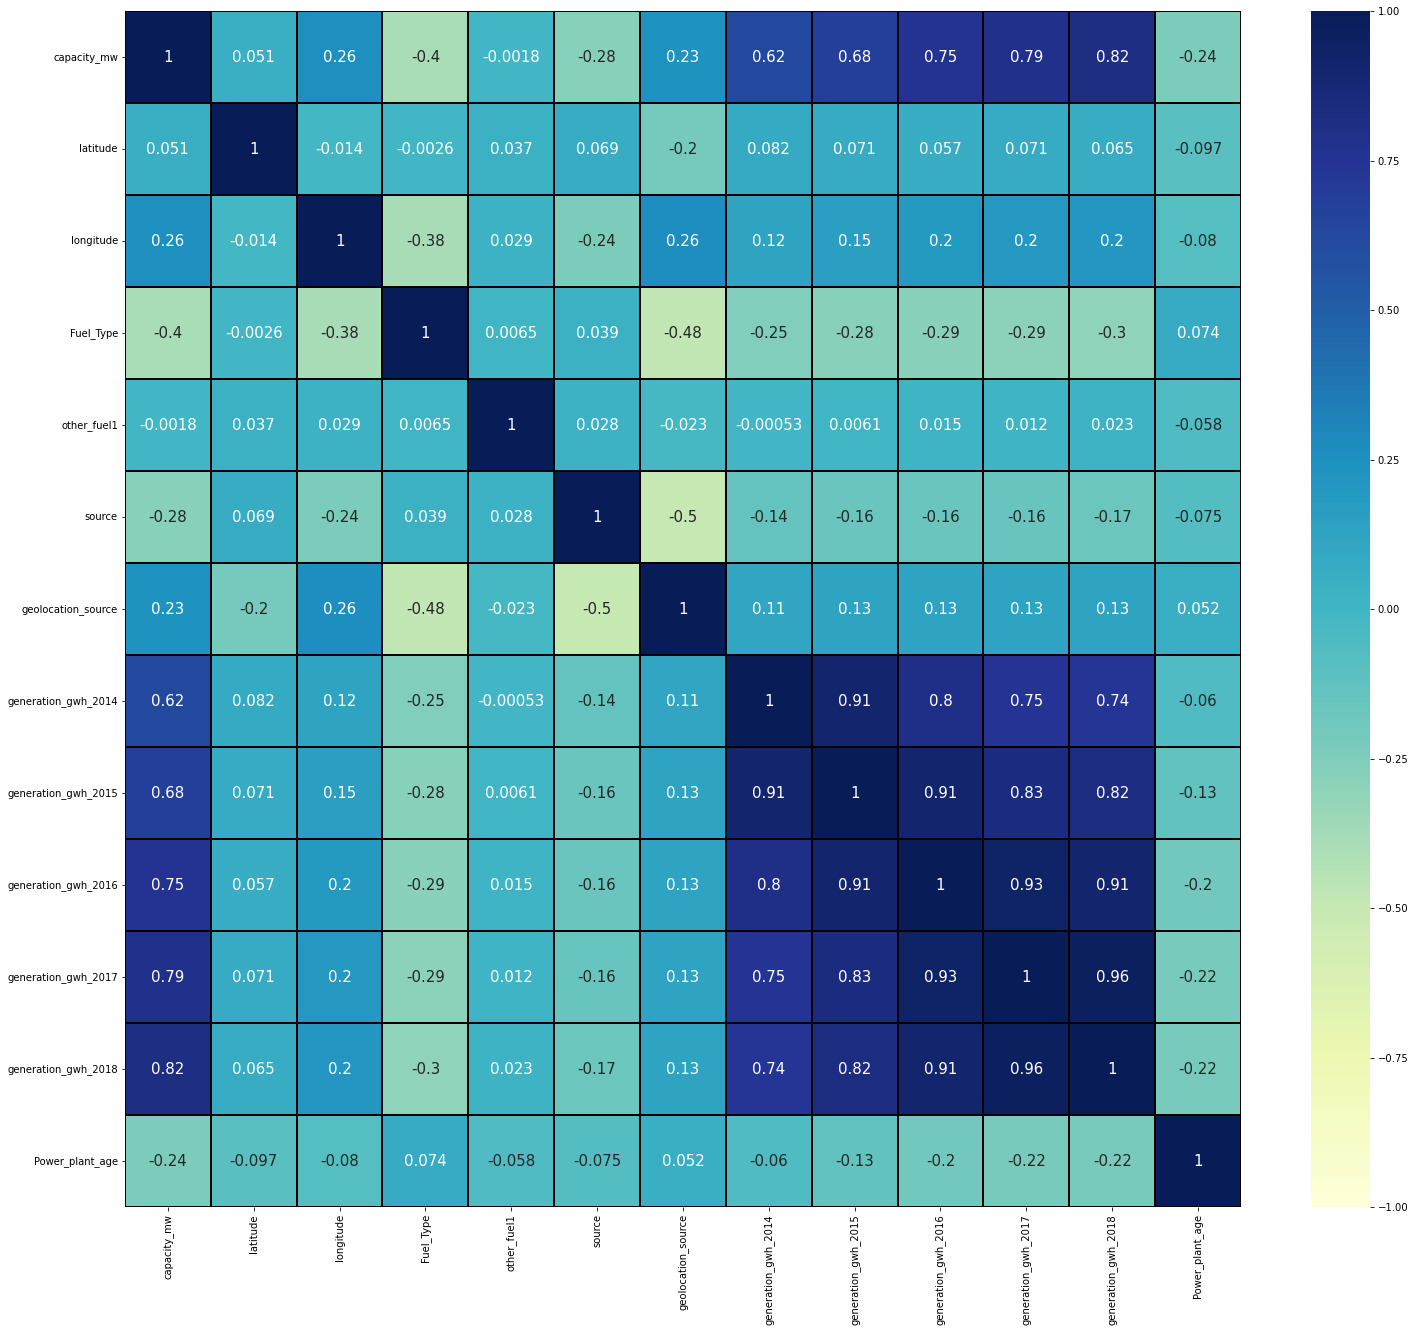

In [75]:
plt.figure(figsize=(25,22))
sns.heatmap(new_dataframe.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation by visualizing the data. 
The above heat map contains both positive and negative correlation.


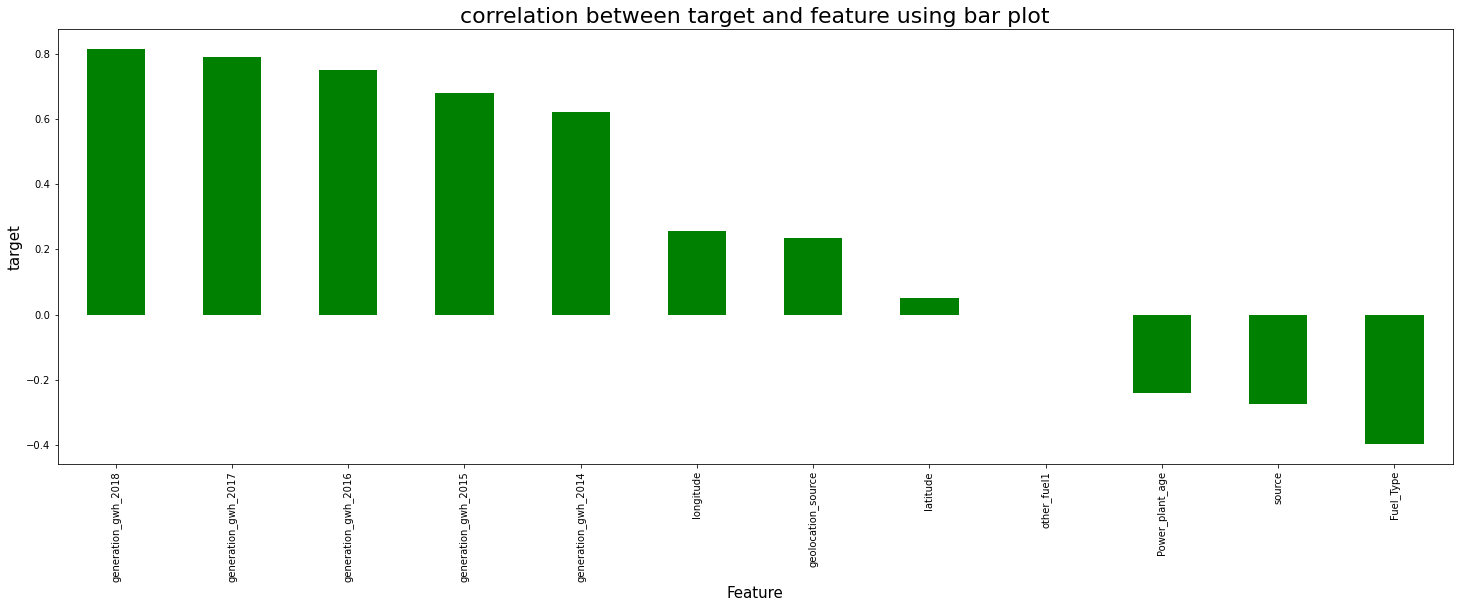

In [76]:
plt.figure(figsize=(25,8))
new_dataframe.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between target and feature using bar plot',fontsize=22)
plt.show()

The plot shows the correlation between capacity_mw and features. 
In the above plot the positive and negative correlation between the features and the target.


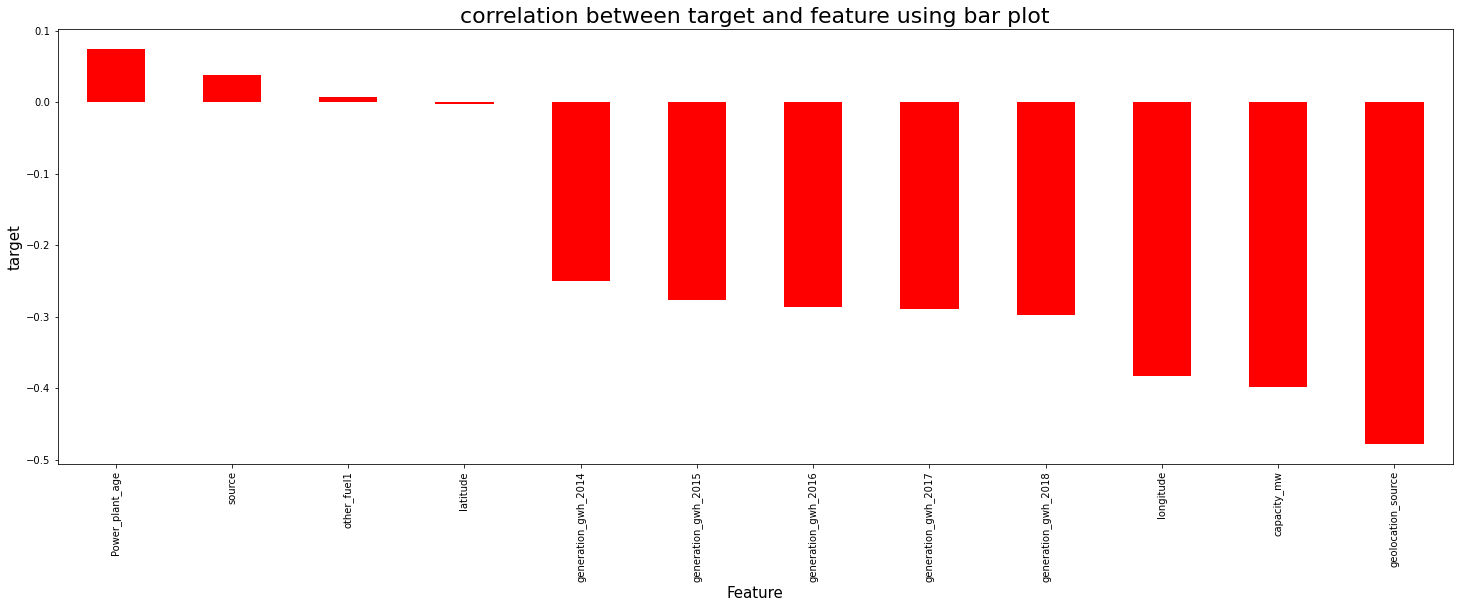

In [77]:
plt.figure(figsize=(25,8))
new_dataframe.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between target and feature using bar plot',fontsize=22)
plt.show()

In the above plot other_fuel1 and latitude have very less correlation as compared to others.

In [78]:
new_dataframe.drop("other_fuel1",axis=1,inplace=True)


In [79]:
new_dataframe.drop("latitude",axis=1,inplace=True)

In [80]:
new_dataframe.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [81]:
x=new_dataframe.drop("capacity_mw", axis=1)
y=new_dataframe["capacity_mw"]

In [82]:
x.shape

(851, 10)

In [83]:
y.shape

(851,)

In [84]:
x.skew()

longitude              0.945877
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In the above column we find the skewness more than +0.5 and -0.5 in the following column Longitude,geolocation_source, source,generation_gwh_2014
generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 and Power_plant_age . 




In [85]:
skewness_value = ['longitude','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [86]:
x[skewness_value] = scaler.fit_transform(x[skewness_value].values)
x[skewness_value].head()

,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.922012,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,-0.499829,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-2.377759,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,2.430594,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.261979,0.409046,1.426798,2.286603,2.276671,1.983083,-1.758384


In [87]:
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.039798
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    2.597029
Power_plant_age        0.043734
dtype: float64

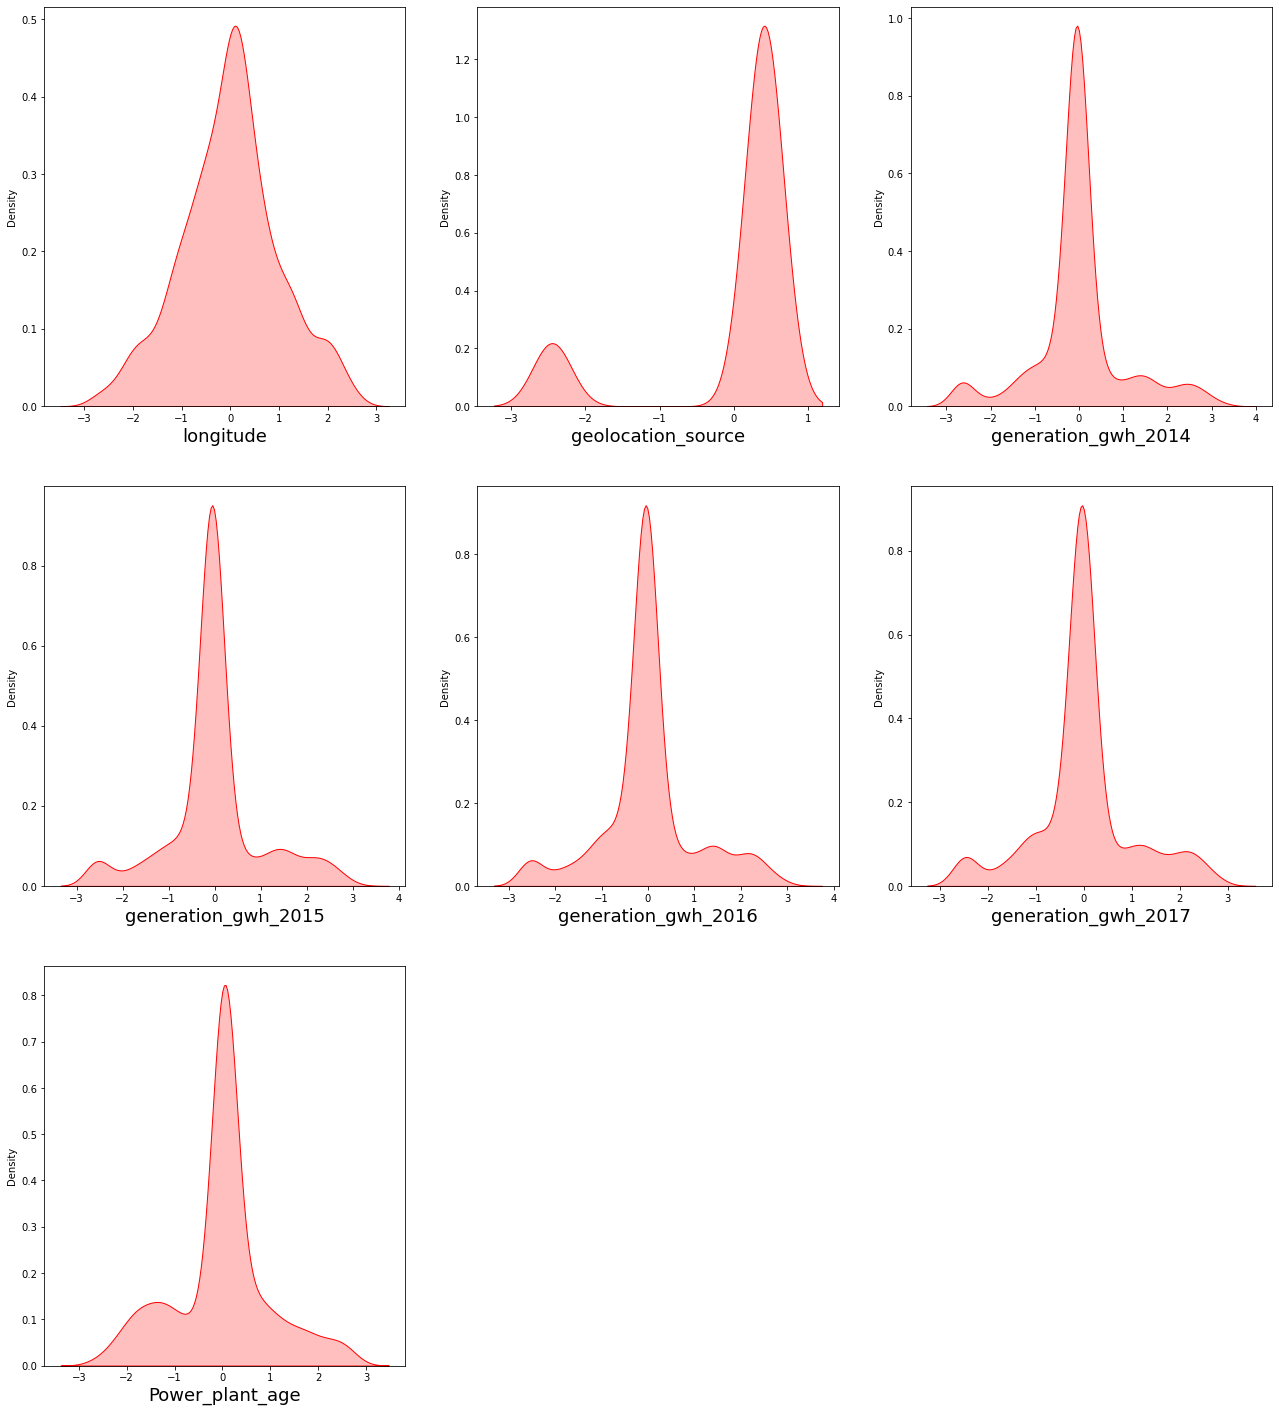

In [88]:
plt.figure(figsize=(22,25), facecolor='white')
plotnumber = 1

for column in x[skewness_value]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,-1.081421
1,-0.499829,-0.975797,2.821796,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
2,-2.377759,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
3,2.430594,-0.545536,-0.507812,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.396134,-0.245810
4,1.261979,-0.975797,-0.507812,0.409046,1.426798,2.286603,2.276671,1.983083,3.357413,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.409046,-0.044061,-2.461379,-0.842266,0.010837,-0.362135,-1.980960
847,0.421592,1.175506,0.696980,-2.451124,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
848,-0.224400,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
849,-0.760624,-0.975797,0.302685,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.312902,longitude
1,1.784894,Fuel_Type
2,1.609874,source
3,1.905201,geolocation_source
4,3.588214,generation_gwh_2014
5,6.207387,generation_gwh_2015
6,9.573695,generation_gwh_2016
7,6.822296,generation_gwh_2017
8,3.934412,generation_gwh_2018
9,1.144133,Power_plant_age


In the above column we have VIF values less than 10 which means in the dataset multicollinearity problem have been solved

In [91]:
x.head()

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-2.240519,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,-1.081421
1,-0.499829,-0.975797,2.821796,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
2,-2.377759,1.605767,-0.529717,0.409046,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
3,2.430594,-0.545536,-0.507812,0.409046,-0.268922,0.093773,0.105691,-0.199692,-0.396134,-0.245810
4,1.261979,-0.975797,-0.507812,0.409046,1.426798,2.286603,2.276671,1.983083,3.357413,-1.758384


In [92]:
y.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train, y_train)
    predRFR= RFR.predict(x_test)
    acc=r2_score(y_test, predRFR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8607204155751274  on Random_state  185


The best accuracy is 86% on the Random state 185

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=115)

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [97]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8307115734546129
MAE: 97.85556290057322
MSE: 33926.855455063655
RMSE: 184.19244136246107


The accuracy score for Random Forest Regressor model is 83.07%

In [98]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr =dtr.predict(x_test)
print('R2_Score:',r2_score(y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(y_test, preddtr))
print('MSE:',metrics.mean_squared_error(y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

R2_Score: 0.7387223108912149
MAE: 119.23597721354166
MSE: 52362.294179928715
RMSE: 228.8280887040066


The accuracy score for Decision Tree Regressor is 73%.

In [99]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
knn.score(x_train,y_train)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.7963857022171213
MAE: 106.26581640625
MSE: 40806.05502947328
RMSE: 202.00508664257265


The accuracy score for KNN is 79%

In [100]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB.score(x_train,y_train)
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.8294537177929917
MAE: 103.92927251461353
MSE: 34178.94053900005
RMSE: 184.87547305957068


The accuracy score for GB is 82%

In [101]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
BR.score(x_train,y_train)
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_Score: 0.8035783265620084
MAE: 107.01241840080493
MSE: 39364.59130114135
RMSE: 198.40511914046309


The accuracy score for BR is 80%

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
print("Print cross_val_score for RFR:",cross_val_score(RFR,x,y,cv=5).mean())
print("Print cross_val_score for DTR:",cross_val_score(dtr,x,y,cv=5).mean())
print("Print cross_val_score for knn:",cross_val_score(knn,x,y,cv=5).mean())
print("Print cross_val_score for GB:",cross_val_score(GB,x,y,cv=5).mean())
print("Print cross_val_score for BR:",cross_val_score(BR,x,y,cv=5).mean())



Print cross_val_score for RFR: 0.7841937587700887
Print cross_val_score for DTR: 0.5866379759561532
Print cross_val_score for knn: 0.7464693135196897
Print cross_val_score for GB: 0.7511329651895451
Print cross_val_score for BR: 0.7602435301664492


In the above dataset, there is the difference between R2 score and the cross validation score.

Further we conclude that Random Forest Regressor as our best fitting model. 



In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [106]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)


In [107]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [108]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [109]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 184.19244136246107
R2_Score: 83.40364118457876


In [110]:
import joblib
joblib.dump(capacity,"Power_plant_capacity.pkl")

['Power_plant_capacity.pkl']

In [111]:
x_df = new_dataframe.drop("Fuel_Type", axis=1)
y_df = new_dataframe["Fuel_Type"]

In [112]:
x_df.shape

(851, 10)

In [113]:
y_df.shape

(851,)

In [114]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [115]:
skew = ['capacity_mw','longitude',"source",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [116]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,1.528061,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,0.220284,-0.499829,1.981788,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-0.274381,-2.377759,-0.488176,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,0.391670,2.430594,-0.421677,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.731859,1.261979,-0.421677,1.426798,2.286603,2.276671,1.983083,-1.758384


In [117]:
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                -0.173043
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    2.597029
Power_plant_age        0.043734
dtype: float64

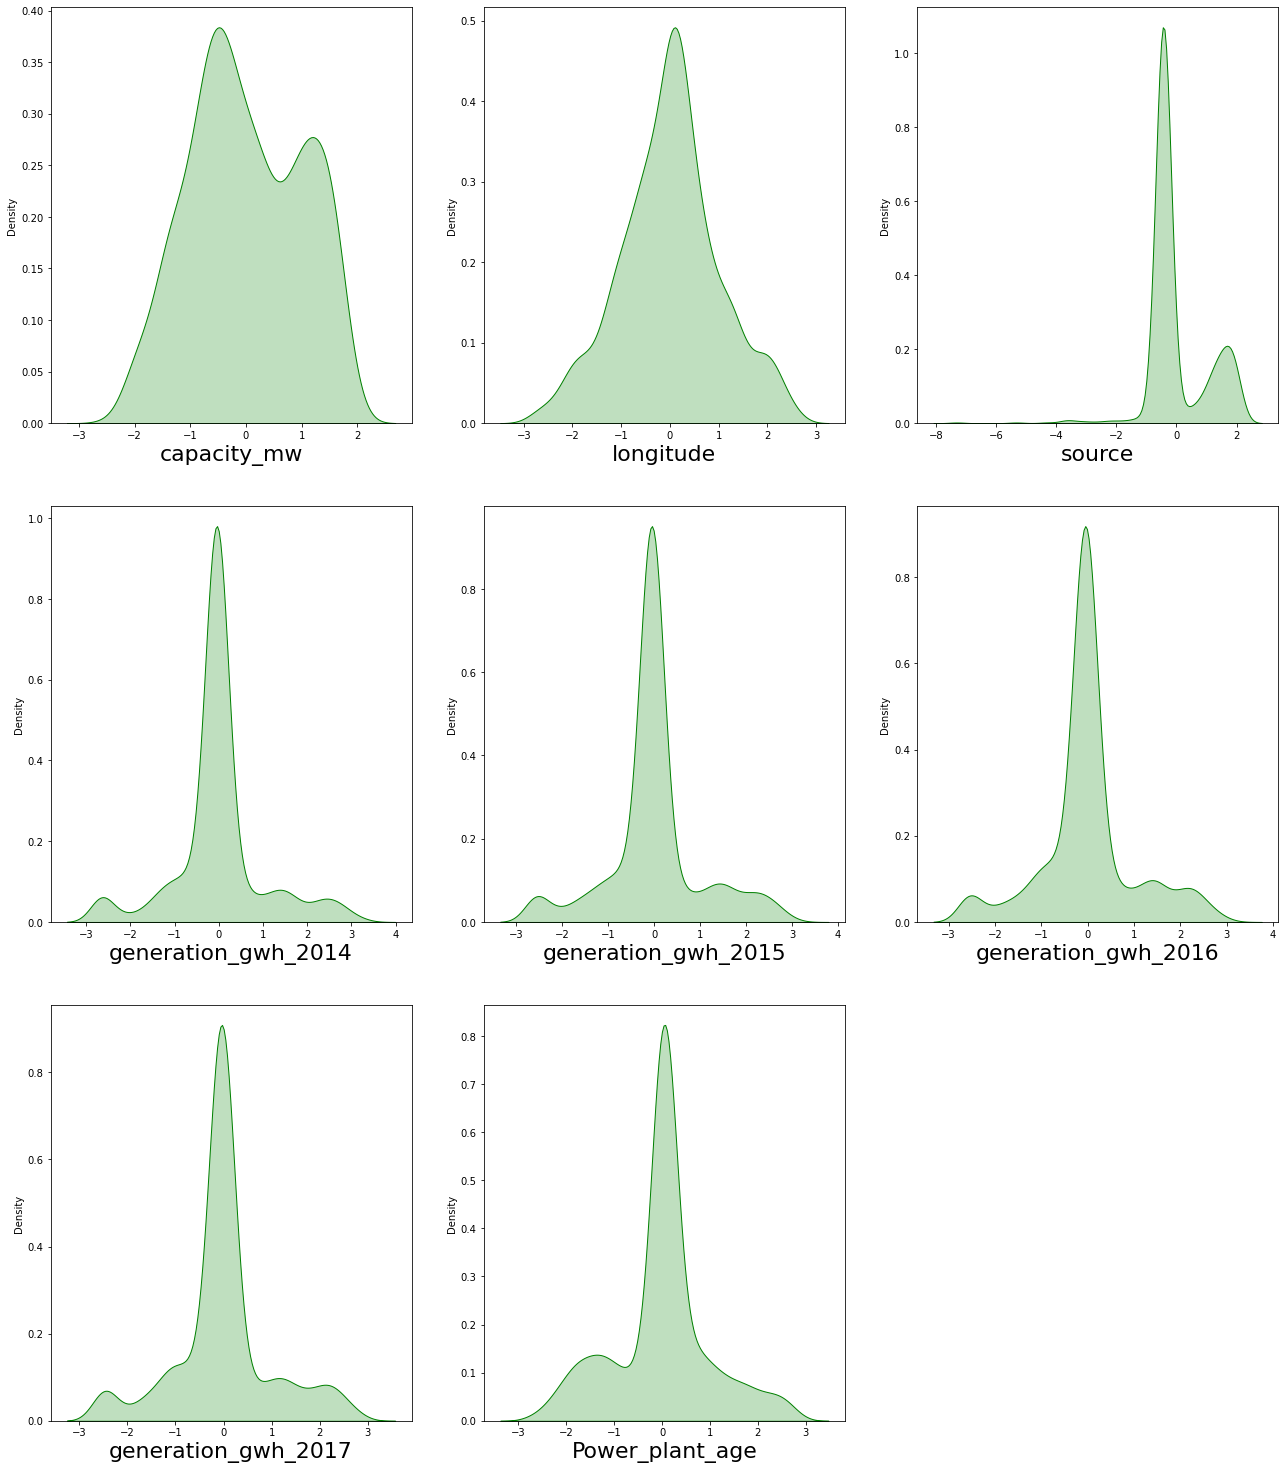

In [118]:
plt.figure(figsize=(22,26), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.528061,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,-1.081421
1,0.220284,-0.499829,1.981788,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
2,-0.274381,-2.377759,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
3,0.391670,2.430594,-0.421677,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.396134,-0.245810
4,1.731859,1.261979,-0.421677,0.407145,1.426798,2.286603,2.276671,1.983083,3.357413,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.421677,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.362135,-1.980960
847,-1.598186,0.421592,1.158844,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
848,-0.507278,-0.224400,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
849,0.111201,-0.760624,0.856354,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187


In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

vif

,VIF values,Features
0,2.139775,capacity_mw
1,1.197813,longitude
2,1.241831,source
3,1.501407,geolocation_source
4,3.608849,generation_gwh_2014
5,6.208486,generation_gwh_2015
6,9.581997,generation_gwh_2016
7,6.837635,generation_gwh_2017
8,4.411496,generation_gwh_2018
9,1.168831,Power_plant_age


In [121]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)


In [123]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: Fuel_Type, dtype: int64

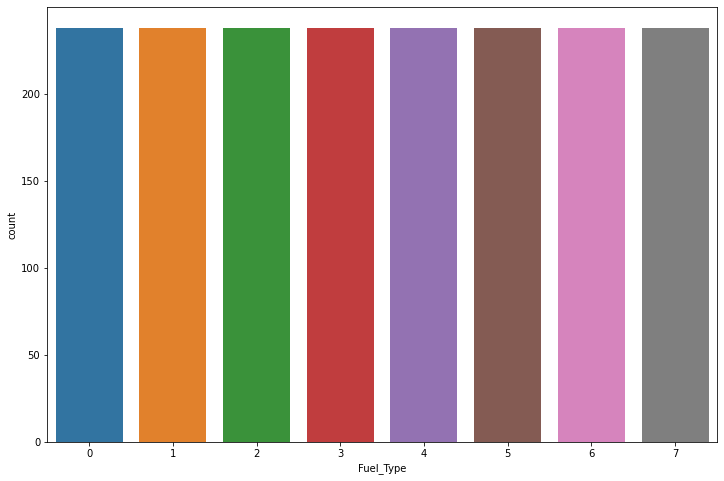

In [124]:
plt.figure(figsize=(12,8))
sns.countplot(y_df)
plt.show()

In [125]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.528061,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,-1.081421
1,0.220284,-0.499829,1.981788,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
2,-0.274381,-2.377759,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.325380,0.046187
3,0.391670,2.430594,-0.421677,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.396134,-0.245810
4,1.731859,1.261979,-0.421677,0.407145,1.426798,2.286603,2.276671,1.983083,3.357413,-1.758384


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30, random_state =i)
    dtc= DecisionTreeClassifier()
    dtc.fit(x_df_train, y_df_train)
    pred =dtc.predict(x_df_test)
    acc=accuracy_score(y_df_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8898601398601399  on Random_state  87


In [127]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=115)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [129]:
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)
dtc.score(x_df_train,y_df_train)
preddtc = dtc.predict(x_df_test)
print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))




0.8688811188811189
[[73  5  0  0  0  0  0  0]
 [ 5 33  7 13  6  2  0  0]
 [ 1  3 51  4  5  9  0  0]
 [ 0  0  5 63  3  0  0  0]
 [ 0  1  1  1 65  0  0  0]
 [ 0  1  2  1  0 54  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        78
           1       0.77      0.50      0.61        66
           2       0.77      0.70      0.73        73
           3       0.77      0.89      0.82        71
           4       0.82      0.96      0.88        68
           5       0.83      0.93      0.88        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.87       572
   macro avg       0.86      0.86      0.86       572
weighted avg       0.87      0.87      0.86       572



we are getting 86% accuracy using Decision Tree Classifier.

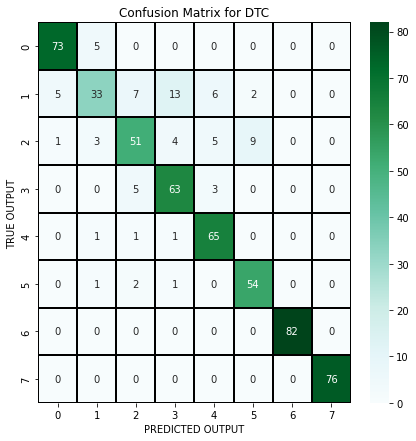

In [130]:
CM = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for DTC')
plt.show()

In [131]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)
RFC.score(x_df_train,y_df_train)
predRFC = RFC.predict(x_df_test)
print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test,predRFC))

0.9178321678321678
[[77  0  0  0  0  1  0  0]
 [ 5 42  6  7  3  3  0  0]
 [ 1  2 59  3  2  6  0  0]
 [ 0  2  3 65  1  0  0  0]
 [ 0  0  0  0 68  0  0  0]
 [ 0  0  0  2  0 56  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        78
           1       0.91      0.64      0.75        66
           2       0.87      0.81      0.84        73
           3       0.84      0.92      0.88        71
           4       0.92      1.00      0.96        68
           5       0.85      0.97      0.90        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.92       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.92      0.92      0.91       572



The accuracy for Random Forest Classifier has 91.%.

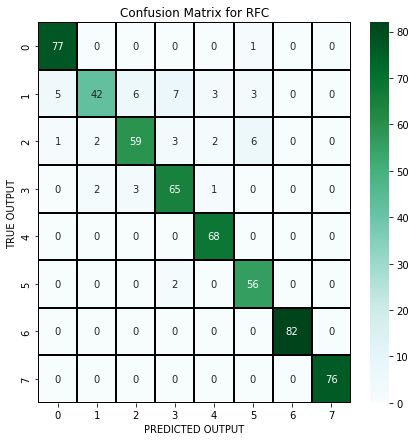

In [132]:
CM=confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for RFC')
plt.show()



In [133]:
svc= SVC(kernel="rbf")
svc.fit(x_df_train,y_df_train)
svc.score(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.8321678321678322
[[75  0  0  0  0  1  0  2]
 [ 8 33  8  3  9  4  0  1]
 [ 2  3 42  4  6 16  0  0]
 [ 0  4  9 48  1  1  0  8]
 [ 0  0  0  0 68  0  0  0]
 [ 0  1  0  1  0 52  0  4]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        78
           1       0.80      0.50      0.62        66
           2       0.71      0.58      0.64        73
           3       0.86      0.68      0.76        71
           4       0.81      1.00      0.89        68
           5       0.70      0.90      0.79        58
           6       1.00      1.00      1.00        82
           7       0.84      1.00      0.91        76

    accuracy                           0.83       572
   macro avg       0.83      0.83      0.82       572
weighted avg       0.83      0.83      0.82       572



The accuracy score Support Vector Classifier is 83%

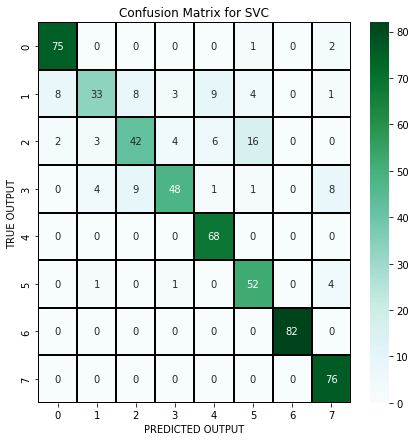

In [134]:
CM=confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for SVC')
plt.show()


In [135]:
knn = KNN()
knn.fit(x_df_train,y_df_train)
knn.score(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)
print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test,predknn))


0.8776223776223776
[[77  0  0  0  0  1  0  0]
 [ 6 38  6  3 10  3  0  0]
 [ 2  3 55  3  2  8  0  0]
 [ 0  1  7 55  1  1  0  6]
 [ 0  0  1  0 67  0  0  0]
 [ 0  0  4  1  0 53  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  1  0 75]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        78
           1       0.90      0.58      0.70        66
           2       0.75      0.75      0.75        73
           3       0.89      0.77      0.83        71
           4       0.84      0.99      0.91        68
           5       0.79      0.91      0.85        58
           6       1.00      1.00      1.00        82
           7       0.93      0.99      0.96        76

    accuracy                           0.88       572
   macro avg       0.88      0.87      0.87       572
weighted avg       0.88      0.88      0.87       572



The accuracy using KNN is 88%

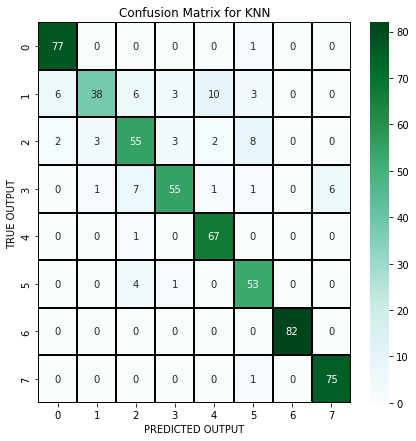

In [136]:
CM=confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for KNN')
plt.show()


In [137]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)
GB.score(x_df_train,y_df_train)
predGB = GB.predict(x_df_test)
print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.8951048951048951
[[76  1  1  0  0  0  0  0]
 [ 6 42  4  6  6  2  0  0]
 [ 1  4 48  7  3 10  0  0]
 [ 0  1  3 65  1  1  0  0]
 [ 0  0  0  0 68  0  0  0]
 [ 0  0  1  2  0 55  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        78
           1       0.88      0.64      0.74        66
           2       0.84      0.66      0.74        73
           3       0.81      0.92      0.86        71
           4       0.87      1.00      0.93        68
           5       0.81      0.95      0.87        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.90       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.90      0.90      0.89       572



The accuracy using Gradient Boosting Classifier is 89.51%

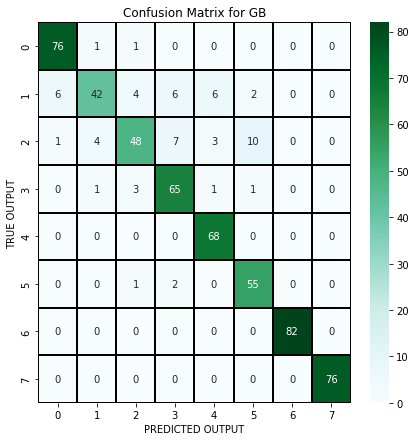

In [138]:
CM=confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for GB')
plt.show()


In [139]:
from sklearn.ensemble import BaggingClassifier
BC= BaggingClassifier()
BC.fit(x_df_train,y_df_train)
BC.score(x_df_train,y_df_train)
predBC = BC.predict(x_df_test)
print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test,predBC))

0.9125874125874126
[[78  0  0  0  0  0  0  0]
 [ 6 39  7  8  3  3  0  0]
 [ 2  2 59  2  3  5  0  0]
 [ 0  3  2 65  1  0  0  0]
 [ 0  1  0  0 67  0  0  0]
 [ 0  0  1  1  0 56  0  0]
 [ 0  0  0  0  0  0 82  0]
 [ 0  0  0  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        78
           1       0.87      0.59      0.70        66
           2       0.86      0.81      0.83        73
           3       0.86      0.92      0.88        71
           4       0.91      0.99      0.94        68
           5       0.88      0.97      0.92        58
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        76

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.90       572
weighted avg       0.91      0.91      0.91       572



The accuracy using BaggingClassifier is 91.25%

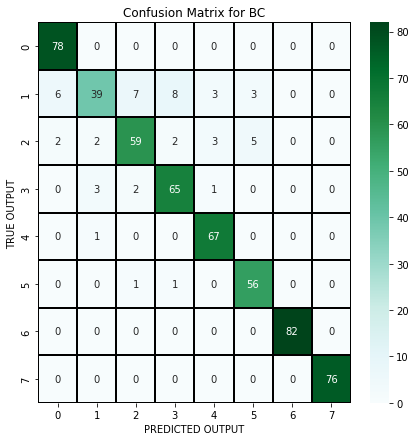

In [140]:
CM=confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]


f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for BC')
plt.show()

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
print('cv score for Decision Tree Classifier:',cross_val_score(dtc,x_df,y_df,cv=5).mean())
print('cv score for Random Tree Classifier:',cross_val_score(RFC,x_df,y_df,cv=5).mean())
print('cv score for Support Vector Classifier:',cross_val_score(svc,x_df,y_df,cv=5).mean())
print('cv score for KNN:',cross_val_score(knn,x_df,y_df,cv=5).mean())
print('cv score for GB:',cross_val_score(GB,x_df,y_df,cv=5).mean())
print('cv score for BC:',cross_val_score(BC,x_df,y_df,cv=5).mean())

cv score for Decision Tree Classifier: 0.8581986462218538
cv score for Random Tree Classifier: 0.9180563613758806
cv score for Support Vector Classifier: 0.8093479762398121
cv score for KNN: 0.8566169360408896
cv score for GB: 0.9033623428650366
cv score for BC: 0.8981060920016576


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [145]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [146]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [147]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [154]:
Power= KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Power.fit(x_df_train, y_df_train)
pred=Power.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

90.20979020979021


In [155]:
import joblib
joblib.dump(Power,"Power_Model.obj")

['Power_Model.obj']

In [156]:
model=joblib.load("Power_Model.obj")

predict=model.predict(x_df_test)
predict

array([3, 0, 4, 6, 3, 7, 4, 4, 2, 0, 0, 4, 5, 7, 0, 1, 2, 4, 7, 4, 0, 6,
       0, 5, 1, 7, 3, 5, 2, 7, 1, 5, 0, 0, 4, 1, 3, 0, 2, 5, 0, 7, 7, 0,
       2, 0, 2, 0, 2, 1, 6, 2, 6, 0, 0, 3, 3, 7, 6, 1, 5, 1, 3, 3, 5, 0,
       6, 7, 2, 3, 0, 4, 4, 5, 2, 6, 2, 3, 7, 0, 4, 6, 5, 2, 4, 3, 6, 0,
       2, 1, 7, 4, 6, 5, 0, 0, 0, 7, 4, 6, 3, 2, 7, 7, 3, 6, 1, 0, 4, 5,
       7, 7, 7, 6, 4, 6, 0, 3, 5, 6, 0, 3, 7, 6, 2, 5, 6, 0, 4, 0, 7, 4,
       0, 5, 6, 6, 0, 3, 4, 2, 7, 3, 1, 7, 7, 5, 7, 1, 3, 0, 5, 4, 2, 0,
       5, 5, 1, 6, 7, 4, 4, 7, 7, 2, 0, 6, 6, 0, 0, 4, 2, 7, 2, 4, 6, 6,
       3, 7, 7, 2, 6, 5, 6, 6, 7, 4, 0, 5, 6, 7, 5, 5, 6, 4, 0, 3, 0, 5,
       3, 1, 5, 3, 1, 4, 4, 7, 4, 7, 3, 6, 6, 2, 6, 3, 0, 4, 6, 4, 0, 6,
       3, 6, 7, 7, 0, 7, 2, 5, 2, 2, 1, 0, 7, 0, 0, 5, 3, 7, 3, 1, 1, 2,
       0, 1, 1, 0, 5, 4, 3, 0, 3, 3, 5, 2, 3, 0, 5, 4, 7, 6, 6, 0, 6, 1,
       6, 2, 2, 4, 4, 6, 2, 5, 6, 0, 3, 3, 6, 4, 6, 0, 4, 4, 3, 7, 2, 6,
       5, 5, 5, 3, 0, 1, 3, 0, 3, 2, 5, 6, 5, 4, 4,